# <div align="center"> <span style="color:red">Capacité numérique 6 </span>  </div> 


## <div align="center"> Représentation des équipotentielles et des lignes de champ </div> 

## I - Cas d'une charge ponctuelle

### A - Position du problème

Considérons un point de charge $q$ en un point $M$ de l'espace. Nous avons vu en cours que le champ électrostatique créé en tout point $P$ de l'espace s'exprime : 
$$ \overrightarrow{E} = \dfrac{1}{4\pi\varepsilon_0}\dfrac{q}{MP^3}\overrightarrow{MP}$$
De même on peut exprimer le potentiel : 
$$ V = \dfrac{1}{4\pi\varepsilon_0}\dfrac{q}{MP}$$


Afin de représenter grâce à une algorithme python les lignes de champ et les équipotentielles on dispose de deux fonctions pré-programmées dans la bibliothèque `matplotlib.pyplot` : `contour` et `streamplot`.\
Voici leurs caractéristiques : 

In [1]:
import matplotlib.pyplot as plt
help(plt.streamplot)

Help on function streamplot in module matplotlib.pyplot:

streamplot(x, y, u, v, density=1, linewidth=None, color=None, cmap=None, norm=None, arrowsize=1, arrowstyle='-|>', minlength=0.1, transform=None, zorder=None, start_points=None, maxlength=4.0, integration_direction='both', *, data=None)
    Draw streamlines of a vector flow.
    
    Parameters
    ----------
    x, y : 1D/2D arrays
        Evenly spaced strictly increasing arrays to make a grid.  If 2D, all
        rows of *x* must be equal and all columns of *y* must be equal; i.e.,
        they must be as if generated by ``np.meshgrid(x_1d, y_1d)``.
    u, v : 2D arrays
        *x* and *y*-velocities. The number of rows and columns must match
        the length of *y* and *x*, respectively.
    density : float or (float, float)
        Controls the closeness of streamlines. When ``density = 1``, the domain
        is divided into a 30x30 grid. *density* linearly scales this grid.
        Each cell in the grid can have, at mos

In [2]:
help(plt.contour)

Help on function contour in module matplotlib.pyplot:

contour(*args, data=None, **kwargs)
    Plot contour lines.
    
    Call signature::
    
        contour([X, Y,] Z, [levels], **kwargs)
    
    `.contour` and `.contourf` draw contour lines and filled contours,
    respectively.  Except as noted, function signatures and return values
    are the same for both versions.
    
    Parameters
    ----------
    X, Y : array-like, optional
        The coordinates of the values in *Z*.
    
        *X* and *Y* must both be 2D with the same shape as *Z* (e.g.
        created via `numpy.meshgrid`), or they must both be 1-D such
        that ``len(X) == N`` is the number of columns in *Z* and
        ``len(Y) == M`` is the number of rows in *Z*.
    
        *X* and *Y* must both be ordered monotonically.
    
        If not given, they are assumed to be integer indices, i.e.
        ``X = range(N)``, ``Y = range(M)``.
    
    Z : (M, N) array-like
        The height values over which t

Dans ces deux fonctions apparaîssent `x` et `y` deux `array` qui permettent de constituer une grille. Voici le principe de fonctionnement d'un algorithme qui permet de représenter les lignes de champ et les équipotentielles.

L'espace se ramène à un plan cartésien à 2 dimensions $(x,y)$. Pour effectuer des calculs numérique il faut dans un premier temps penser à définir les limites de cet espace. On les notera `xmin`, `xmax` ; `ymin`, `ymax`.\
Chaque point $P$ de cet espace est repérer par un doublet $(x_P,y_P)$, il faut alors définir numériquement chacune des positions possible de $P$ dans les limites de l'espace choisi. \
C'est ici qu'intervient une fonction python : `meshgrid`, "grille maillée" en français. Cette fonction prend en argument deux listes `array` de même dimension et créé un point à chaque intersection des points de chaque liste.\
Par exemple :

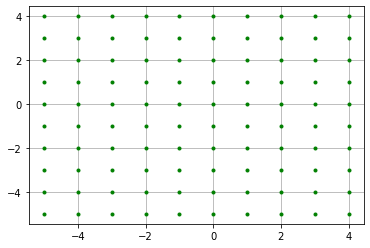

XX=[[-5. -4. -3. -2. -1.  0.  1.  2.  3.  4.]
 [-5. -4. -3. -2. -1.  0.  1.  2.  3.  4.]
 [-5. -4. -3. -2. -1.  0.  1.  2.  3.  4.]
 [-5. -4. -3. -2. -1.  0.  1.  2.  3.  4.]
 [-5. -4. -3. -2. -1.  0.  1.  2.  3.  4.]
 [-5. -4. -3. -2. -1.  0.  1.  2.  3.  4.]
 [-5. -4. -3. -2. -1.  0.  1.  2.  3.  4.]
 [-5. -4. -3. -2. -1.  0.  1.  2.  3.  4.]
 [-5. -4. -3. -2. -1.  0.  1.  2.  3.  4.]
 [-5. -4. -3. -2. -1.  0.  1.  2.  3.  4.]]


In [3]:
import numpy as np

xmin = -5.0
xmax = 5.0
ymin = -5.0
ymax = 5.0

X = np.arange(xmin,xmax,1)
Y = np.arange(ymin,ymax,1)

XX,YY = np.meshgrid(X,Y)

plt.figure()
plt.plot(XX,YY,'g.')
plt.grid(True)
plt.show()
plt.close()

print('XX='+str(XX))

On dispose ainsi des coordonnées de chaque point $P$ en lequel on peut alors faire le calcul du champ et du potentiel. \
Il suffit alors de définir la valeur de la charge ainsi que ses coordonnées et de savoir exprimer les distances $PM$ entre la charge et le point $P$ de calcul du champ. 

Apparaît alors une difficulté : si le point $M$ et le point $P$ sont confondus, alors les expressions des champs et des potentiels diverges.\
On considèrera alors que si $PM < h$ alors $PM = h$.

### B - Mise en oeuvre

On souhaite dans un premier temps déterminer la carte de champ et de potentiel d'une charge ponctuelle unique $q$ et afin de ne pas avoir de problème d'ordre de grandeur dans les valeurs numérique on prendra $q = 10^{-7} \; C$.\
L'espace sera limité à un plan de $6\times6 \; m^2$ centrée en $O$. La charge étant placé au centre. \
Le maillage d'espace sera choisi : $h = 0,1$ afin d'avoir une représentation la moins grossière possible en limitant également le temps de calcul.

1. Importer l'ensemble des bibliothèques nécessaires à la résolution du problème. 

2. Définir les limites de l'espace cartésien, ainsi que le maillage spacial. 

In [5]:
xmin = 
xmax =
ymin = 
ymax =

h = # un pas plus petit augmente la durée de calcul. 


X = 
Y = 


3. Définir la charge ainsi que ces coordonnées.

In [6]:
q = 
x1 = 
y1 = 

4. Définir une fonction `Potentiel` prennant en argument la charge et ses coordonnées, ainsi que tous les points de maillages, et retournant la valeur du potentiel $V$ en chaque point $P$ de l'espace. 
$\dfrac{1}{4\pi\varepsilon_0} \approx 9,0.10^9\; S.I$.

5. Compléter et commenter la suite d'instructions suivantes, permettant de représenter les surfaces équipotentielles et la charge à l'origine de ce potentiel.

In [18]:
V = 

plt.figure()

equ = plt.contour(XX,YY,V,np.linspace(-2000,2000,30),cmap='Reds',linewidths=1)

matplotlib.rcParams['contour.negative_linestyle'] = 'solid'
plt.clabel(equ, fontsize=10, inline=1,fmt='%1.0f')
plt.colorbar(equ)

plt.axis('square')

ax = plt.gca()
radius = 3e5*q
color = 'red' if q > 0 else 'blue'
circle = plt.Circle((x1,y1), radius, color = color)
ax.add_artist(circle)

plt.grid(True)

plt.xlabel()
plt.ylabel()

plt.xlim()
plt.ylim()

plt.show()
plt.close()

SyntaxError: invalid syntax (<ipython-input-18-a72645478a9d>, line 1)

6. Définir une fonction `ChampE` permettant de calculer en chaque point du maillage les coordonnées `Ex` et `Ey` du champ électrique.

6. Compléter et commenter les lignes de code suitantes.

In [10]:
Ex,Ey = 

In [19]:
plt.figure()

ch = plt.streamplot(linewidth=0.5,density=1,minlength=0.05)

plt.axis('square')

ax = plt.gca()
radius = 3e5*q
color = 'red' if q > 0 else 'blue'
circle = plt.Circle((x1,y1), radius, color = color)
ax.add_artist(circle)

plt.grid()

plt.xlabel()
plt.ylabel()

plt.xlim()
plt.ylim()
plt.show()
plt.close()

TypeError: streamplot() missing 4 required positional arguments: 'x', 'y', 'u', and 'v'

<Figure size 432x288 with 0 Axes>

7. Ecrire une succession d'instructions permettant de représenter sur un même graphe les équipotentielles et les lignes de champ.

### II - Cas de plusieurs charges ponctuelles

On souhaite maintenant écrire un algorithme python permettant de représenter les lignes de champ et les équipotentielles créées par 4 charges $q_1$ à $q_4$ placées aux sommets d'un carré $(-1,1)$, $(-1,-1)$, $(1,1)$ et $(1,-1)$. Les charges $q_1$ à $q_4$ pouvant être alternativement négatives ou positives. 

8. Ecrire ces algorithmes.

In [20]:
xmin = 
xmax =
ymin = 
ymax =

#-------------------------------------------------------------- 
h =# un pas plus petit augmente la durée de calcul. 


#-------------------------------------------------------------- 

q = [] #Ensemble des valeurs de charge (à compléter à souhait)
x1 = [] #Ensemble des valeurs des abcisses x des charges.
y1 = []

#-------------------------------------------------------------- 

#définir ici la fonction Potentiel

#-------------------------------------------------------------- 

#définir ici la fonction ChampE

#-------------------------------------------------------------- 

V = PotentielV() #application de la fonction potentiel aux données.

Ex,Ey = ChampE() #application de la fonction pour les données précédentes.

#-------------------------------------------------------------- 




SyntaxError: invalid syntax (<ipython-input-20-d74854f80b0d>, line 1)

In [21]:
q = [] #Ensemble des valeurs de charge (à compléter à souhait)

 #application de la fonction potentiel aux données.

 #application de la fonction pour les données précédentes.

#-------------------------------------------------------------- 




In [22]:
q = [] #Ensemble des valeurs de charge (à compléter à souhait)

 #application de la fonction potentiel aux données.

 #application de la fonction pour les données précédentes.

#-------------------------------------------------------------- 




In [23]:
q = [] #Ensemble des valeurs de charge (à compléter à souhait)

 #application de la fonction potentiel aux données.

 #application de la fonction pour les données précédentes.

#-------------------------------------------------------------- 




In [24]:
q = [] #Ensemble des valeurs de charge (à compléter à souhait)

 #application de la fonction potentiel aux données.

 #application de la fonction pour les données précédentes.

#-------------------------------------------------------------- 


